# **Section C**

In [1]:
#importing required modules and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1) Data Processing and Visualization

In [2]:
#load training dataset and divide labels and features
data = pd.read_csv("fashion-mnist_train.csv")
data = data.iloc[:8000]
X_train = data.drop(columns = 'label')
y_train = data['label']

#load validation set and divide labels and features
data = pd.read_csv("fashion-mnist_train.csv")
data = data.iloc[8000:10000]
X_val = data.drop(columns = 'label')
y_val = data['label']

#load testing dataset and divide labels and features
data = pd.read_csv("fashion-mnist_test.csv")
data = data.iloc[:2000]
X_test = data.drop(columns = 'label')
y_test = data['label']

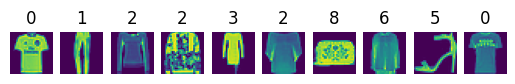

In [3]:
#visualise a few images from testing set
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28))
    plt.title(f"{y_test[i]}")
    plt.axis('off')
plt.show()

In [4]:
#data pre-processing
#normalize images bringing values to the range [0,1]
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

print('Training set shape:', X_train.shape)
print('Validation set shape:', X_val.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (8000, 784)
Validation set shape: (2000, 784)
Testing set shape: (2000, 784)


# 2) Model Training

hidden_layer_sizes = (128, 64, 32)  
solver = adam  
lr = 2e-5  
epochs = 100  
batch_size = 128  
activation functions = logistic, tanh, relu, identity

test set accuracy for logistic activation: 0.0955


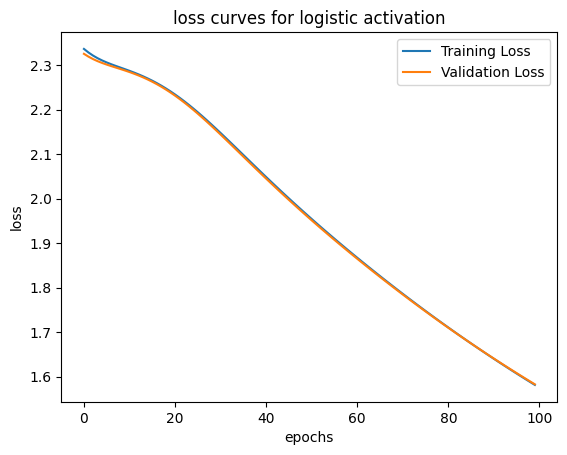

In [9]:
#classifier with logistic activation function
classifier_logistic = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='logistic', solver='adam',
                      learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    classifier_logistic.partial_fit(X_train, y_train, np.unique(y_train)) #partial fit for 1 iteration
    train_loss.append(classifier_logistic.loss_) #training loss
    val_loss.append(log_loss(y_val, classifier_logistic.predict_proba(X_val))) #validaiton loss

#see performance on test set
y_test_pred = classifier_logistic.predict(X_test)
print('test set accuracy for logistic activation:', accuracy_score(y_val, y_test_pred))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for logistic activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

test set accuracy for tanh activation: 0.0955


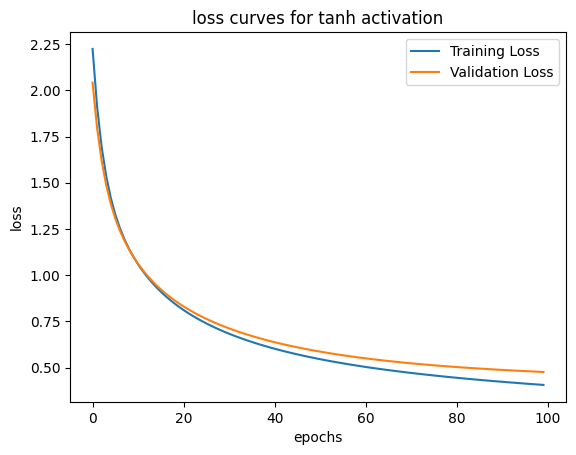

In [6]:
#classifier with tanh activation function
classifier_tanh = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam',
                      learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    classifier_tanh.partial_fit(X_train, y_train, np.unique(y_train)) #partial fit for 1 iteration
    train_loss.append(classifier_tanh.loss_) #training loss
    val_loss.append(log_loss(y_val, classifier_tanh.predict_proba(X_val))) #validaiton loss

#see performance on test set
y_test_pred = classifier_tanh.predict(X_test)
print('test set accuracy for tanh activation:', accuracy_score(y_val, y_test_pred))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for tanh activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

test set accuracy for relu activation: 0.097


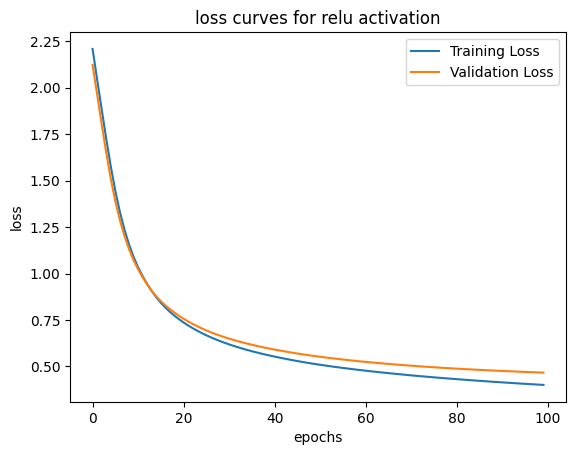

In [ ]:
#classifier with relu activation function
classifier_relu = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                      learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    classifier_relu.partial_fit(X_train, y_train, np.unique(y_train)) #partial fit for 1 iteration
    train_loss.append(classifier_relu.loss_) #training loss
    val_loss.append(log_loss(y_val, classifier_relu.predict_proba(X_val))) #validaiton loss

#see performance on test set
y_test_pred = classifier_relu.predict(X_test)
print('test set accuracy for relu activation:', accuracy_score(y_val, y_test_pred))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for relu activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

test set accuracy for identity activation: 0.0955


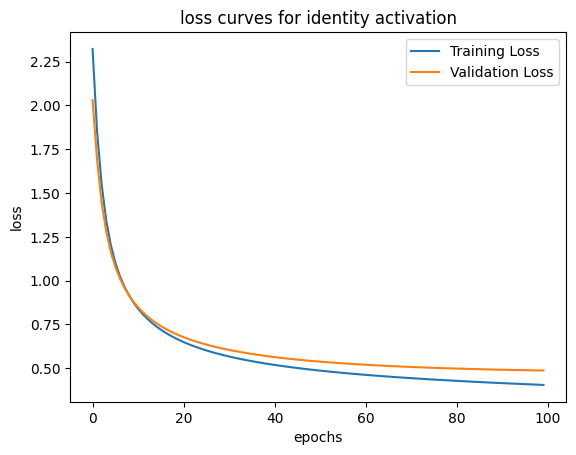

In [8]:
#classifier with identity activation function
classifier_identity = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='identity', solver='adam',
                      learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    classifier_identity.partial_fit(X_train, y_train, np.unique(y_train)) #partial fit for 1 iteration
    train_loss.append(classifier_identity.loss_) #training loss
    val_loss.append(log_loss(y_val, classifier_identity.predict_proba(X_val))) #validaiton loss

#see performance on test set
y_test_pred = classifier_identity.predict(X_test)
print('test set accuracy for identity activation:', accuracy_score(y_val, y_test_pred))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for identity activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# 3) Hyperparameter Tuning with Grid Search

In [ ]:
#parameter grid for hyperparameter tuning
param_grid = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [2e-1, 2e-3, 2e-5],
    'batch_size': [64, 128, 256]
}

#intialize model with best activation function, i.e. ReLU
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=100, random_state=42)

#perform grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, verbose=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'batch_size': 256, 'learning_rate_init': 0.002, 'solver': 'adam'}
Best Score: 0.8604989173802636


# 4) MLP Regressor

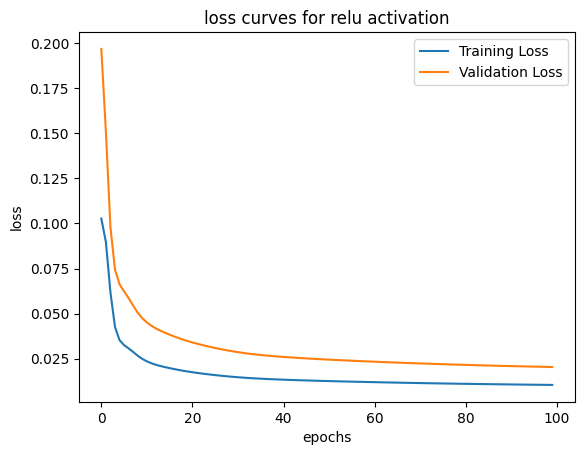

In [17]:
#regressor with relu activation function
regressor_relu = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 128, 256), activation='relu', solver='adam',
                     learning_rate_init=2e-5, batch_size=128, max_iter=100, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    regressor_relu.partial_fit(X_train, X_train) #partial fit for 1 iteration
    train_loss.append(regressor_relu.loss_) #training loss
    val_loss.append(mean_squared_error(X_val, regressor_relu.predict(X_val))) #validaiton loss

#plot losses
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for relu activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Original Images in Testing Set


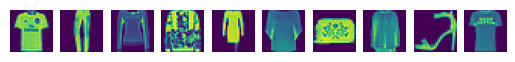

Images reconstructed by model with ReLU activation


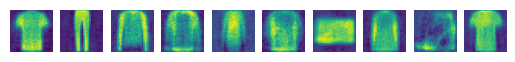

In [18]:
#visualise images from testing set
print('Original Images in Testing Set')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28))
    plt.axis('off')
plt.show()

#visualise reconstructed images by the model
print('Images reconstructed by model with ReLU activation')
pred = regressor_relu.predict(X_test)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pred[i].reshape(28, 28))
    plt.axis('off')
plt.show()

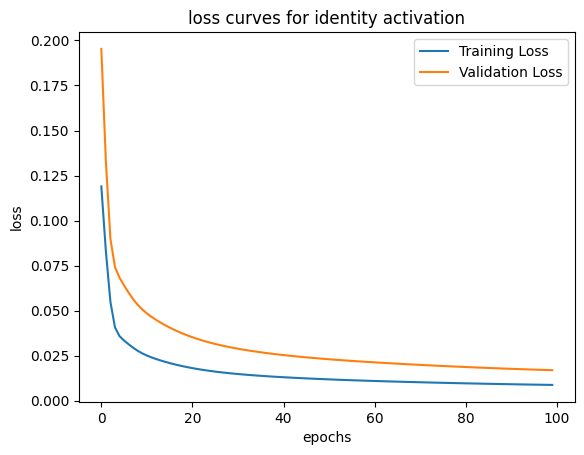

In [19]:
#regressor with identity activation function
regressor_identity = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 128, 256), activation='identity', solver='adam',
                     learning_rate_init=2e-5, batch_size=128, max_iter=100, random_state=42)
train_loss = []
val_loss = []

for i in range(100):
    regressor_identity.partial_fit(X_train, X_train) #partial fit for 1 iteration
    train_loss.append(regressor_identity.loss_) #training loss
    val_loss.append(mean_squared_error(X_val, regressor_identity.predict(X_val))) #validaiton loss

#plot losses
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title(f"loss curves for identity activation")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Original Images in Testing Set


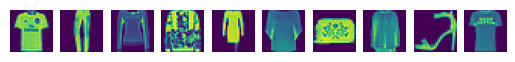

Images reconstructed by model with identity activation


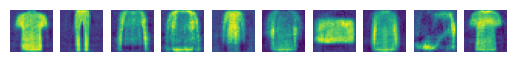

In [20]:
#visualise images from testing set
print('Original Images in Testing Set')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28))
    plt.axis('off')
plt.show()

#visualise reconstructed by from the model
print('Images reconstructed by model with identity activation')
pred = regressor_identity.predict(X_test)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pred[i].reshape(28, 28))
    plt.axis('off')
plt.show()

# 5) Training Classifiers on features extracted from Regressors

In [ ]:
#function to extract activations(features) from a specific layer of a model with ReLu activation
def get_hidden_activations_relu(model, X, layer_index):
    activations = X
    #model.coefs_ is a list of weight matrices for each layer
    #model.intercept_ is a list of bias vectors for each layer
    for i in range(layer_index):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        activations = np.maximum(activations, 0) #apply ReLU activation, i.e. ReLU(x) = max(0, x)
    return activations

#extract feature vector of size 'a', i.e. 64, for train, validaiton and test sets
X_train_r = get_hidden_activations_relu(regressor_relu, X_train, layer_index=3)
X_val_r = get_hidden_activations_relu(regressor_relu, X_val, layer_index=3)
X_test_r = get_hidden_activations_relu(regressor_relu, X_test, layer_index=3)
print('Reduced training set shape:', X_train_r.shape)

Reduced training set shape: (8000, 64)


In [22]:
#model with relu activation function
model_relu = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam',
                      learning_rate_init=2e-5, max_iter=200, batch_size=128, random_state=42)
model_relu.fit(X_train_r, y_train)

#see performance on test set
y_test_pred = model_relu.predict(X_test_r)
print('test set accuracy for relu activation:', accuracy_score(y_val, y_test_pred))

test set accuracy for relu activation: 0.0945


In [23]:
#function to extract activations(features) from a specific layer of a model with identity activation
def get_hidden_activations_identity(model, X, layer_index):
    activations = X
    #model.coefs_ is a list of weight matrices for each layer
    #model.intercept_ is a list of bias vectors for each layer
    for i in range(layer_index):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
    return activations

#extract feature vector of size 'a', i.e. 64, for train, validaiton and test sets
X_train_r = get_hidden_activations_identity(regressor_identity, X_train, layer_index=3)
X_val_r = get_hidden_activations_identity(regressor_identity, X_val, layer_index=3)
X_test_r = get_hidden_activations_identity(regressor_identity, X_test, layer_index=3)
print('Reduced training set shape:', X_train_r.shape)

Reduced training set shape: (8000, 64)


In [24]:
#model with identity activation function
model_identity = MLPClassifier(hidden_layer_sizes=(64, 64), activation='identity', solver='adam',
                      learning_rate_init=2e-5, max_iter=200, batch_size=128, random_state=42)
model_identity.fit(X_train_r, y_train)

#see performance on test set
y_test_pred = model_identity.predict(X_test_r)
print('test set accuracy for identity activation:', accuracy_score(y_val, y_test_pred))

test set accuracy for identity activation: 0.096
